# K Nearest Neighbors Project 

Welcome to the KNN Project! This will be a simple project very similar to the lecture, except you'll be given another data set. Go ahead and just follow the directions below.
## Import Libraries
**Import pandas,seaborn, and the usual libraries.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Get the Data
** Read the 'KNN_Project_Data csv file into a dataframe **

In [2]:
df = pd.read_csv('KNN_Project_Data')

**Check the head of the dataframe.**

In [3]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


# EDA

Since this data is artificial, we'll just do a large pairplot with seaborn.

**Use seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.**

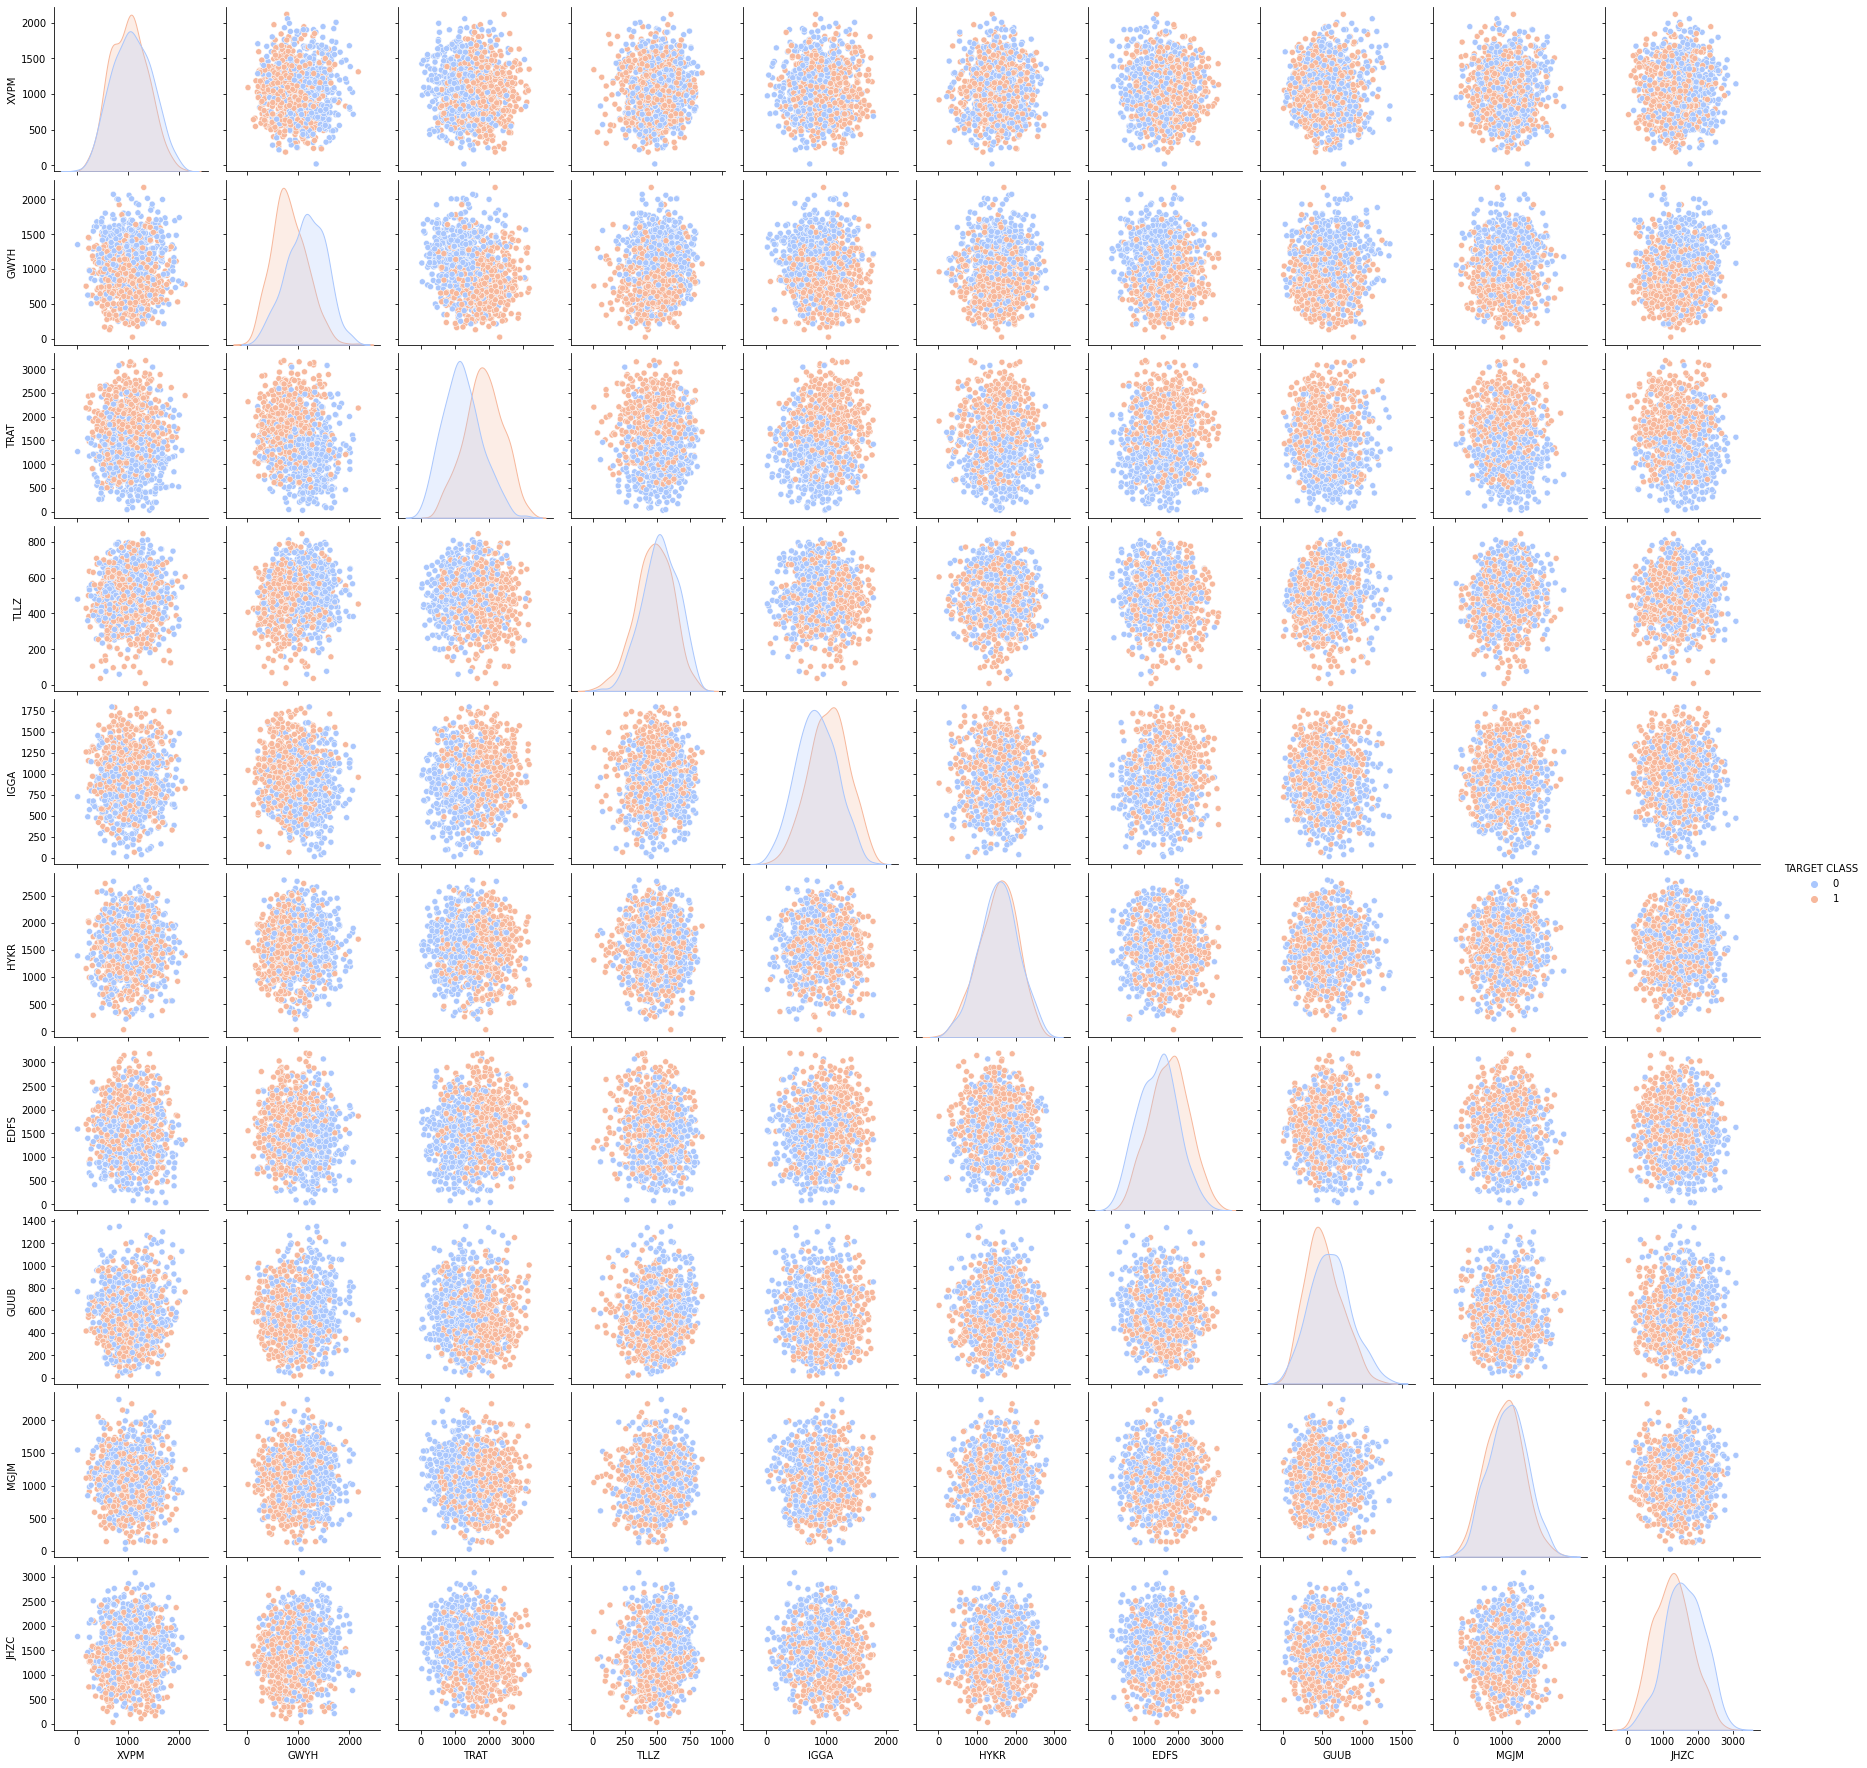

In [4]:
sns.pairplot(df,hue='TARGET CLASS',palette='coolwarm')

# Standardize the Variables

Time to standardize the variables.

** Import StandardScaler from Scikit learn.**

In [5]:
from sklearn.preprocessing import StandardScaler

** Create a StandardScaler() object called scaler.**

In [16]:
scaler = StandardScaler()

** Fit scaler to the features.**

In [17]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

**Use the .transform() method to transform the features to a scaled version.**

In [18]:
scaled_vals = scaler.transform(df.drop('TARGET CLASS',axis=1))
scaled_vals

array([[ 1.56852168, -0.44343461,  1.61980773, ..., -0.93279392,
         1.00831307, -1.06962723],
       [-0.11237594, -1.05657361,  1.7419175 , ..., -0.46186435,
         0.25832069, -1.04154625],
       [ 0.66064691, -0.43698145,  0.77579285, ...,  1.14929806,
         2.1847836 ,  0.34281129],
       ...,
       [-0.35889496, -0.97901454,  0.83771499, ..., -1.51472604,
        -0.27512225,  0.86428656],
       [ 0.27507999, -0.99239881,  0.0303711 , ..., -0.03623294,
         0.43668516, -0.21245586],
       [ 0.62589594,  0.79510909,  1.12180047, ..., -1.25156478,
        -0.60352946, -0.87985868]])

In [22]:
scaled_vals.shape

(1000, 10)

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [23]:
scaled_df = pd.DataFrame(scaled_vals, columns= df.columns[:-1])

In [25]:
scaled_df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


# Train Test Split

**Use train_test_split to split your data into a training set and a testing set.**

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test,y_train,y_test = train_test_split(scaled_df, df['TARGET CLASS'],test_size=0.2,random_state=101)

# Using KNN

**Import KNeighborsClassifier from scikit learn.**

In [28]:
from sklearn.neighbors import KNeighborsClassifier

**Create a KNN model instance with n_neighbors=1**

In [29]:
KNN = KNeighborsClassifier(n_neighbors=1)

**Fit this KNN model to the training data.**

In [30]:
KNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

# Predictions and Evaluations
Let's evaluate our KNN model!

**Use the predict method to predict values using your KNN model and X_test.**

In [31]:
y_preds = KNN.predict(X_test)

** Create a confusion matrix and classification report.**

In [32]:
from sklearn.metrics import confusion_matrix,classification_report

In [35]:
print(confusion_matrix(y_test,y_preds))

[[74 24]
 [24 78]]


In [36]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76        98
           1       0.76      0.76      0.76       102

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.76       200
weighted avg       0.76      0.76      0.76       200



# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

** Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.**

In [38]:
error_rate = []
for i in range(1,40):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_train,y_train)
    y_preds = KNN.predict(X_test)
    error_rate.append(np.mean(y_preds != y_test))

**Now create the following plot using the information from your for loop.**

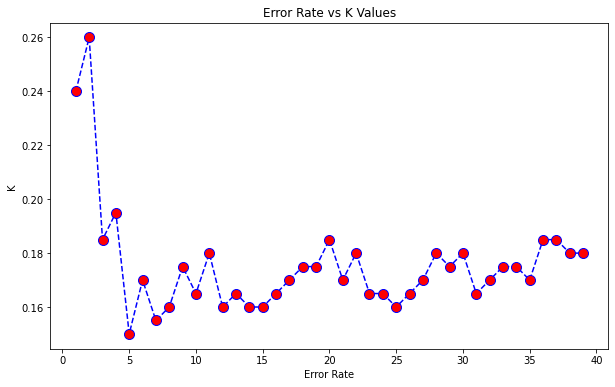

In [39]:
plt.figure(figsize=(10,6))
plt.title('Error Rate vs K Values')
plt.xlabel('Error Rate')
plt.ylabel('K')
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.show()

## Retrain with new K Value

**Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.**

In [40]:
KNN = KNeighborsClassifier(n_neighbors=15)
KNN.fit(X_train,y_train)
y_preds = KNN.predict(X_test)

In [41]:
print(confusion_matrix(y_test,y_preds))

[[82 16]
 [16 86]]


In [42]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        98
           1       0.84      0.84      0.84       102

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200



# Great Job!